In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [25]:
iris = load_iris()
X = iris.data
y = iris.target

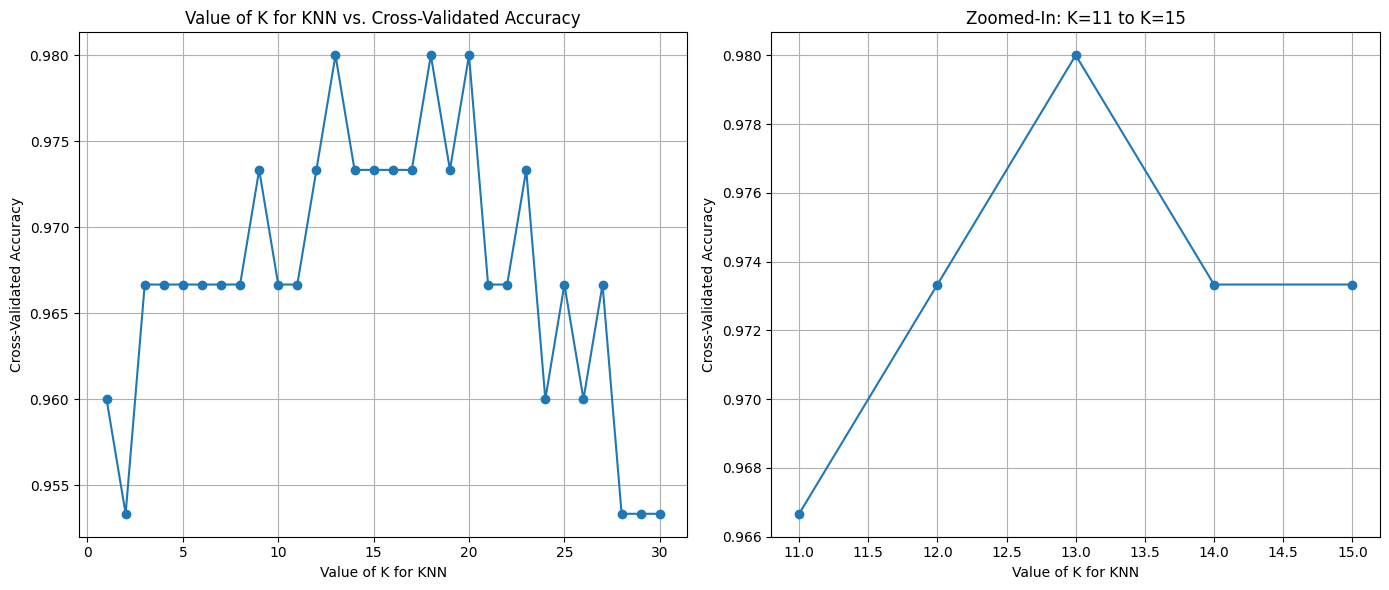

In [26]:
# set range
k_range = range(1, 31)
scores = []

# cross-validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    cv_scores = cross_val_score(knn, X, y, cv=10)
    scores.append(np.mean(cv_scores))

# Plot results of cross-validation
plt.figure(figsize=(14, 6))

# Graph 1: Full range of k values
plt.subplot(1, 2, 1)
plt.plot(k_range, scores, marker='o')
plt.title('Value of K for KNN vs. Cross-Validated Accuracy')
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.grid(True)

# Graph 2: Zoomed-in range of k values
plt.subplot(1, 2, 2)
plt.plot(k_range[10:15], scores[10:15], marker='o')
plt.title('Zoomed-In: K=11 to K=15')
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.grid(True)

plt.tight_layout()
plt.show()

In [27]:
from sklearn.model_selection import KFold

# Define the parameter grid
param_grid = {'n_neighbors': range(1, 31)}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=param_grid, cv=10, scoring='accuracy')

# Fit GridSearchCV
grid_search.fit(X, y)

# Get the best parameters and score
best_k = grid_search.best_params_['n_neighbors']

print(f"Best k value: {best_k}")

# Confirm if k=13 is the optimal parameter
if best_k == 13:
    print("k=13 is confirmed as the optimal parameter.")
else:
    print(f"k={best_k} is the optimal parameter, not k=13.")


Best k value: 13
k=13 is confirmed as the optimal parameter.
